In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('pagedata.csv')
df.drop(['NoVotes', 'YesVotes'], axis = 1, inplace = True)

In [43]:
average = df['Positive%'].mean()
df['AboveAverage'] = df['Positive%'] > average
print('Average: ', round(100*average,1), '%', sep = '')

Average: 72.5%


In [27]:
correlation_beta = df[df['Template'] == 'BetaContentPage'].corr()
correlation_old = df[df['Template'] == 'AdviceguidePage'].corr()
correlation_benefits = df[df['Page'].str.startswith('/benefits/')].corr()

print('beta content pages:', correlation_beta, sep = '\n', end = '\n\n')
print('old content pages:', correlation_old, sep = '\n', end = '\n\n')
print('benefits section (all templates):', correlation_benefits, sep = '\n', end = '\n')

beta content pages:
                 UniquePageviews  TotalVotes  Positive%  WordCount  \
UniquePageviews         1.000000    0.786099   0.111566   0.132433   
TotalVotes              0.786099    1.000000   0.147295   0.007171   
Positive%               0.111566    0.147295   1.000000   0.018792   
WordCount               0.132433    0.007171   0.018792   1.000000   
AboveAverage            0.104901    0.133182   0.822864   0.062244   

                 AboveAverage  
UniquePageviews      0.104901  
TotalVotes           0.133182  
Positive%            0.822864  
WordCount            0.062244  
AboveAverage         1.000000  

old content pages:
                 UniquePageviews  TotalVotes  Positive%  WordCount  \
UniquePageviews         1.000000    0.798875   0.059172   0.338370   
TotalVotes              0.798875    1.000000   0.061925   0.082575   
Positive%               0.059172    0.061925   1.000000   0.025643   
WordCount               0.338370    0.082575   0.025643   1.000000 

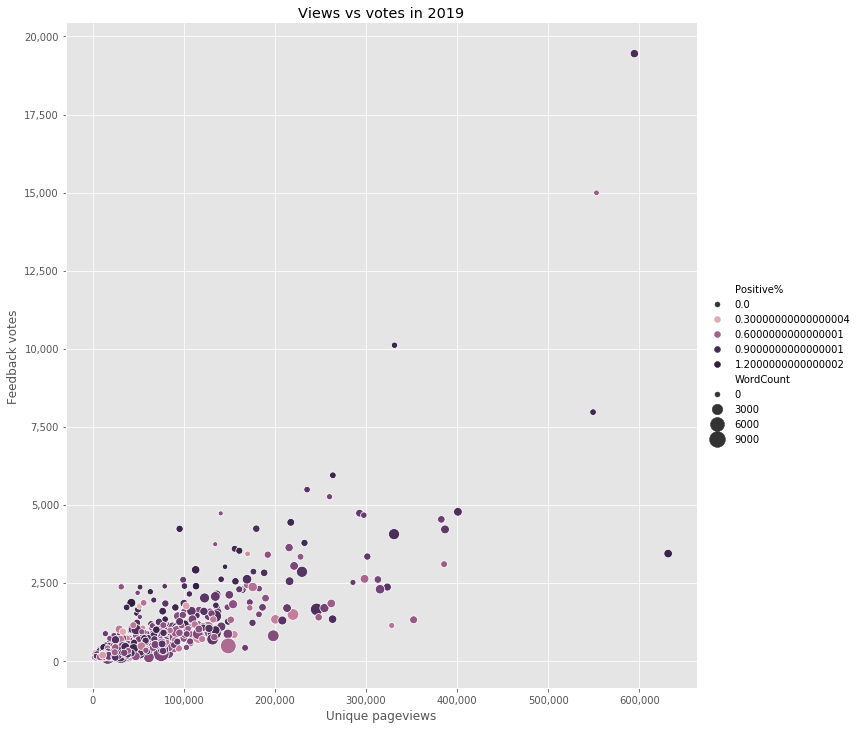

In [54]:
chart = sns.relplot(x='UniquePageviews', 
            y='TotalVotes', 
            hue='Positive%', 
            data=df,
            size='WordCount',
            sizes=(25,250),
            height = 10)

chart.set(title = 'Views vs votes in 2019', xlabel='Unique pageviews', ylabel='Feedback votes')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['{:,.0f}'.format(y) for y in ticks_y]

chart.set_xticklabels(xlabels)
chart.set_yticklabels(ylabels)
